In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

# Load Data

In [2]:
df = pd.read_csv('iris (1).csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


> Predict which type of iris flower it is (virginica, setosa, versicolor) based of 4 features. 
>
> - `Petal Length`
> - `Petal Width`
> - `Sepal Length`
> - `Sepal width`

In [3]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

# Visualizations

## Pairplot

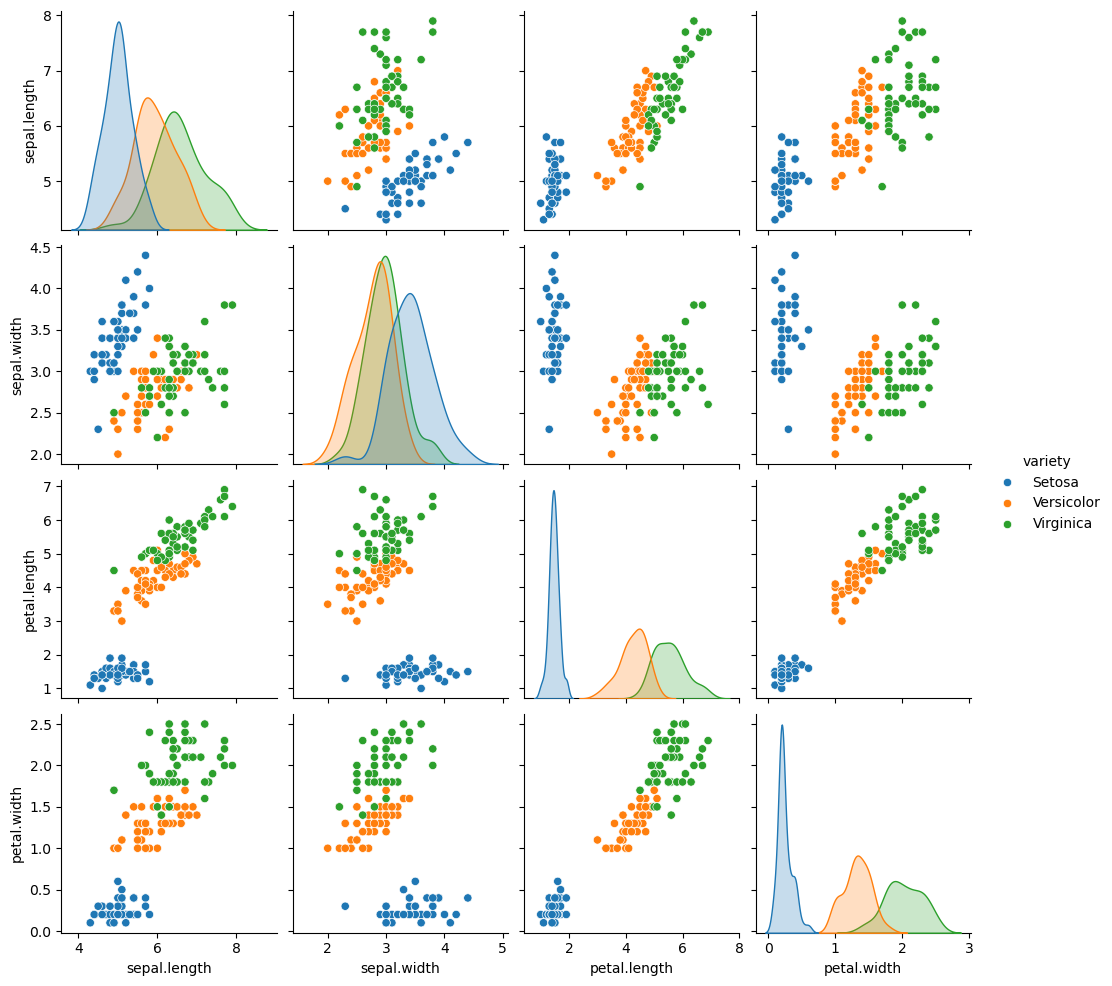

In [37]:
sns.pairplot(df,hue='variety')
plt.show()

## Scatterplot

Text(0.5, 1.0, 'Petal Length vs Petal Width')

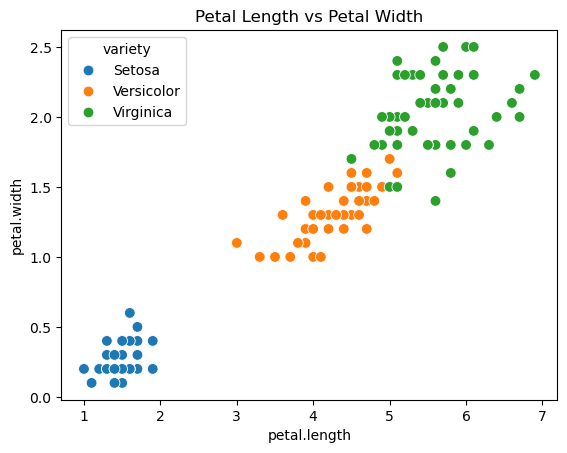

In [45]:
sns.scatterplot(data = df,
                x = 'petal.length',
                y = 'petal.width',
                hue='variety',
               s=60)
plt.title('Petal Length vs Petal Width')

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

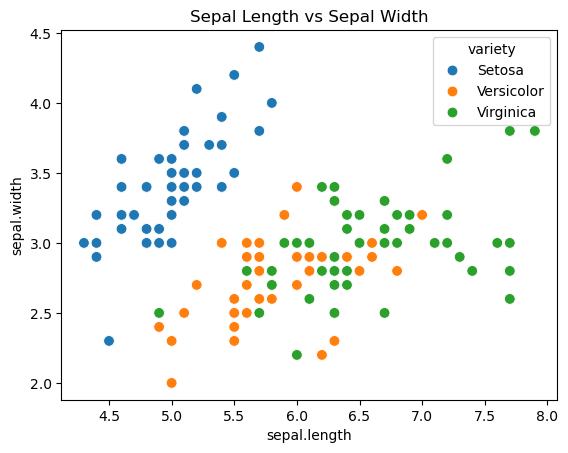

In [47]:
sns.scatterplot(data = df,
                x = 'sepal.length',
                y = 'sepal.width',
                hue = 'variety',
                s = 60)
plt.title('Sepal Length vs Sepal Width')

# Split the features and target

In [50]:
x = df.drop('variety',axis=1)
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
y = df['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

# Train the model

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [71]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [72]:
y_train.shape,y_test.shape

((120,), (30,))

In [73]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [74]:
model.score(x_train,y_train)

0.9666666666666667

In [75]:
model.score(x_test,y_test)

1.0

In [76]:
y_pred = model.predict(x_test)
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

,Actual Value,Predicted Value
73,Versicolor,Versicolor
18,Setosa,Setosa
118,Virginica,Virginica
78,Versicolor,Versicolor
76,Versicolor,Versicolor
31,Setosa,Setosa
64,Versicolor,Versicolor
141,Virginica,Virginica
68,Versicolor,Versicolor
82,Versicolor,Versicolor


In [79]:
accuracy_score(y_test,y_pred)

1.0

<Axes: >

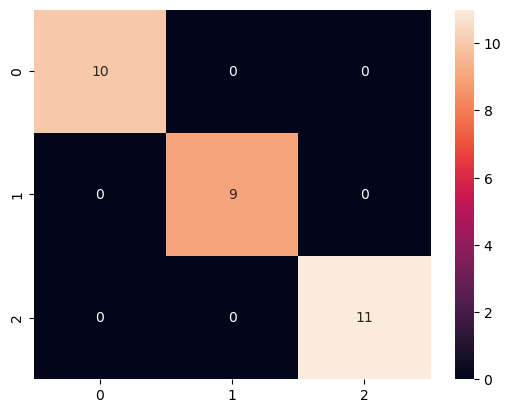

In [82]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot= True)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

